In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import json

from prettytable import PrettyTable

In [3]:
def plot_trigger_scores(data):
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df[['precision', 'recall', 'f1']]
    df = df.reset_index().melt(id_vars=['index'], var_name='score', value_name='value')

    sns.set(style="darkgrid")
    colors = [(0, 0.447, 0.698), (0.863, 0.373, 0.294), (0.275, 0.529, 0.204)]
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x='score', y='value', hue='index', data=df, palette=colors)
    plt.legend(title='Dataset')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.title("Scores achieved by Datasets")
    plt.show()

    table = PrettyTable()
    table.field_names = ['Dataset', 'Recall', 'Precision', 'F1']
    for dataset, scores in data.items():
        table.add_row([dataset, float(scores['recall']), float(scores['precision']), float(scores['f1'])])
    print(table)

In [11]:
def plot_auc_scores2(data, dataset):
    auc_scores_raw = data[dataset]['class_auc']
    auc_scores = {}
    auc_scores = {cls: score if not np.isnan(score) else 0 for cls, score in auc_scores_raw.items()}
    auc_scores['mean_auc'] = data[dataset]['auc']

    df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC Score'])
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Class'}, inplace=True)

    sns.set(style="darkgrid")
    sns.set_palette("husl", len(df))

    plt.figure(figsize=(8, 6))
    plt.axhline(y=0.9828, color='r', linestyle='--', label='Detoxify Baseline (0.9828)')
    ax = sns.barplot(x='Class', y='AUC Score', data=df)
    ax.set(xlabel='Class', ylabel='AUC Score', title=f'AUC Scores per Class for {dataset}')
    
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [12]:
def plot_auc_scores(data, datasets):
    _, axs = plt.subplots(1, 2, figsize=(16, 6))
    for i, dataset in enumerate(datasets):
        auc_scores_raw = data[dataset]['class_auc']
        auc_scores = {}
        auc_scores = {cls: score if not np.isnan(score) else 0 for cls, score in auc_scores_raw.items()}
        auc_scores['mean_auc'] = data[dataset]['auc']

        df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC Score'])
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'Class'}, inplace=True)

        sns.set_palette("husl", len(df))
        sns.set(style="darkgrid", palette="husl", rc={"axes.facecolor": (0, 0, 0, 0)})
        sns.barplot(x='Class', y='AUC Score', data=df, ax=axs[i])

        axs[i].axhline(y=0.9828, color='r', linestyle='--', label='Detoxify Baseline (0.9828)')
        axs[i].set(xlabel='Class', ylabel='AUC Score', title=f'AUC Scores per Class for {dataset}')
        axs[i].set_ylim(0, 1)
        legend = axs[i].legend(loc='lower right')
        legend.get_frame().set_facecolor('w')

    plt.tight_layout()
    plt.show()

In [13]:
def table_roc_auc_scores(jigsaw_raw, secondary_neutral_raw):
    jigsaw_auc_scores = {}
    jigsaw_auc_scores = {cls: score if not np.isnan(score) else 0 for cls, score in jigsaw_raw['class_auc'].items()}
    jigsaw_auc_scores['mean_auc'] = jigsaw_raw['auc']

    secondary_neutral_auc_scores = {}
    secondary_neutral_auc_scores = {cls: score if not np.isnan(score) else 0 for cls, score in secondary_neutral_raw['class_auc'].items()}
    secondary_neutral_auc_scores['mean_auc'] = jigsaw_raw['auc']
    
    table = PrettyTable()
    table.field_names = ['Class', 'Jigsaw', 'Secondary Neutral']
    for class_label in jigsaw_auc_scores.keys():
        table.add_row([class_label, round(jigsaw_auc_scores[class_label], 4), round(secondary_neutral_auc_scores[class_label], 4)])
    print(table)

In [14]:
def plot_all_data(data):
    plot_trigger_scores(data)
    plot_auc_scores(data, ['jigsaw', 'secondary_neutral'])
    table_roc_auc_scores(data['jigsaw'], data['secondary_neutral'])

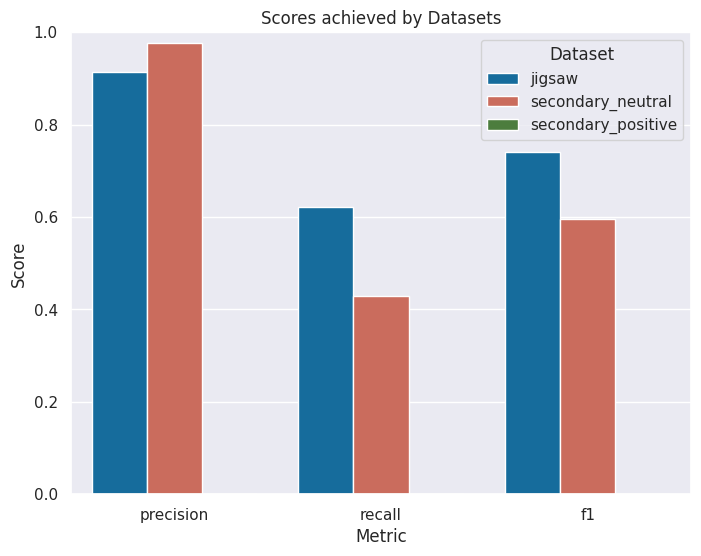

+--------------------+--------+-----------+--------+
|      Dataset       | Recall | Precision |   F1   |
+--------------------+--------+-----------+--------+
|       jigsaw       | 0.6216 |   0.9144  | 0.7401 |
| secondary_neutral  | 0.4288 |   0.9758  | 0.5958 |
| secondary_positive |  0.0   |    0.0    |  0.0   |
+--------------------+--------+-----------+--------+


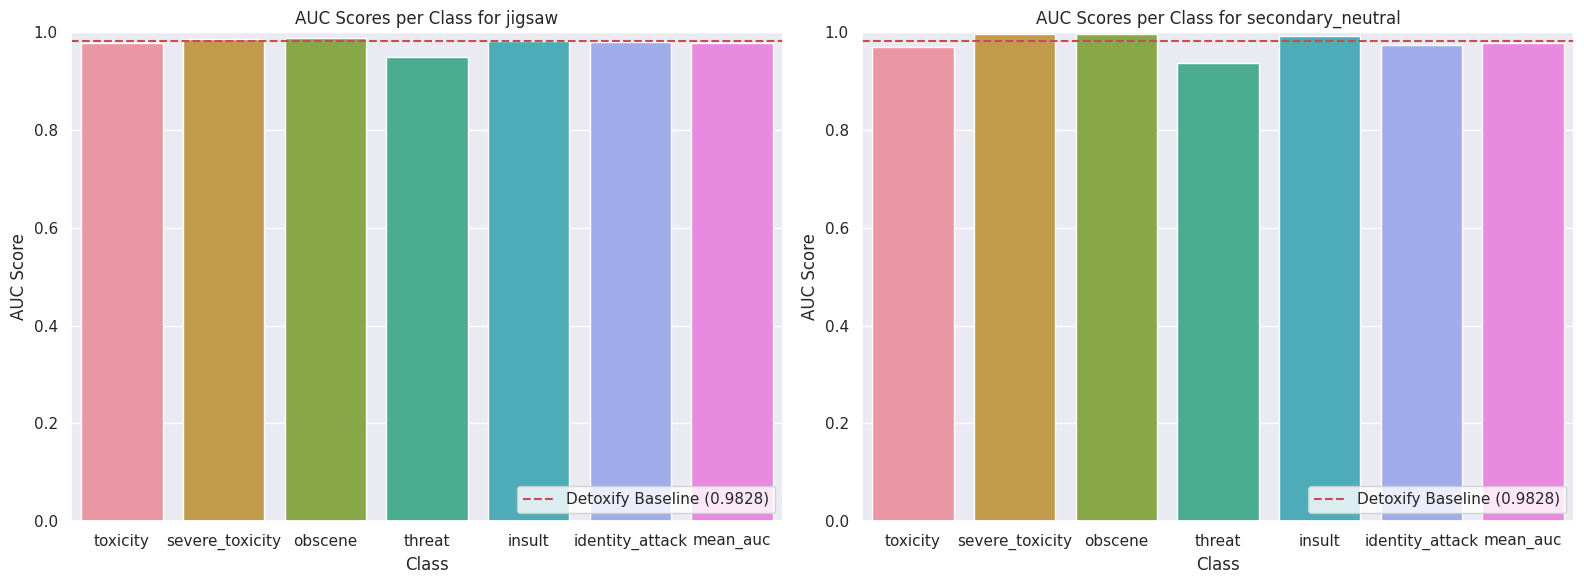

+-----------------+--------+-------------------+
|      Class      | Jigsaw | Secondary Neutral |
+-----------------+--------+-------------------+
|     toxicity    | 0.9778 |       0.9699      |
| severe_toxicity | 0.9864 |       0.9976      |
|     obscene     | 0.9881 |       0.9961      |
|      threat     | 0.9495 |       0.9381      |
|      insult     | 0.9822 |       0.9924      |
| identity_attack | 0.9812 |       0.974       |
|     mean_auc    | 0.9775 |       0.9775      |
+-----------------+--------+-------------------+


In [15]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/blank/checkpoints/converted/epoch=0-step=2981_test_results.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_all_data(data)


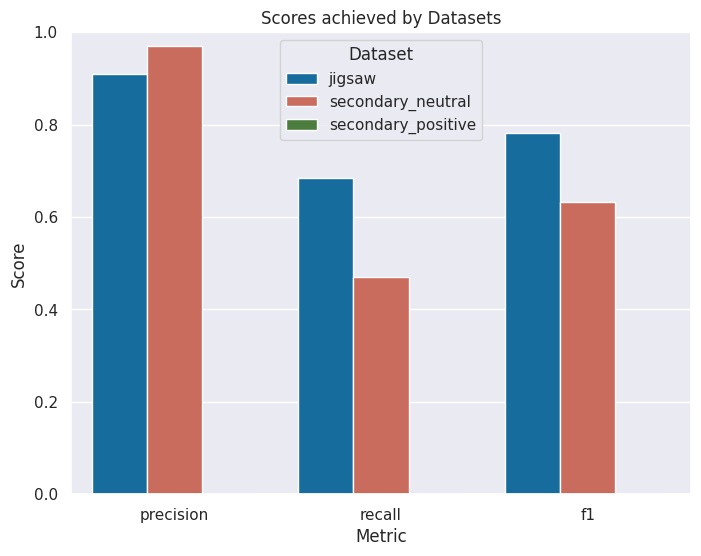

+--------------------+--------+-----------+--------+
|      Dataset       | Recall | Precision |   F1   |
+--------------------+--------+-----------+--------+
|       jigsaw       | 0.6852 |   0.9086  | 0.7812 |
| secondary_neutral  | 0.4703 |    0.97   | 0.6335 |
| secondary_positive |  0.0   |    0.0    |  0.0   |
+--------------------+--------+-----------+--------+


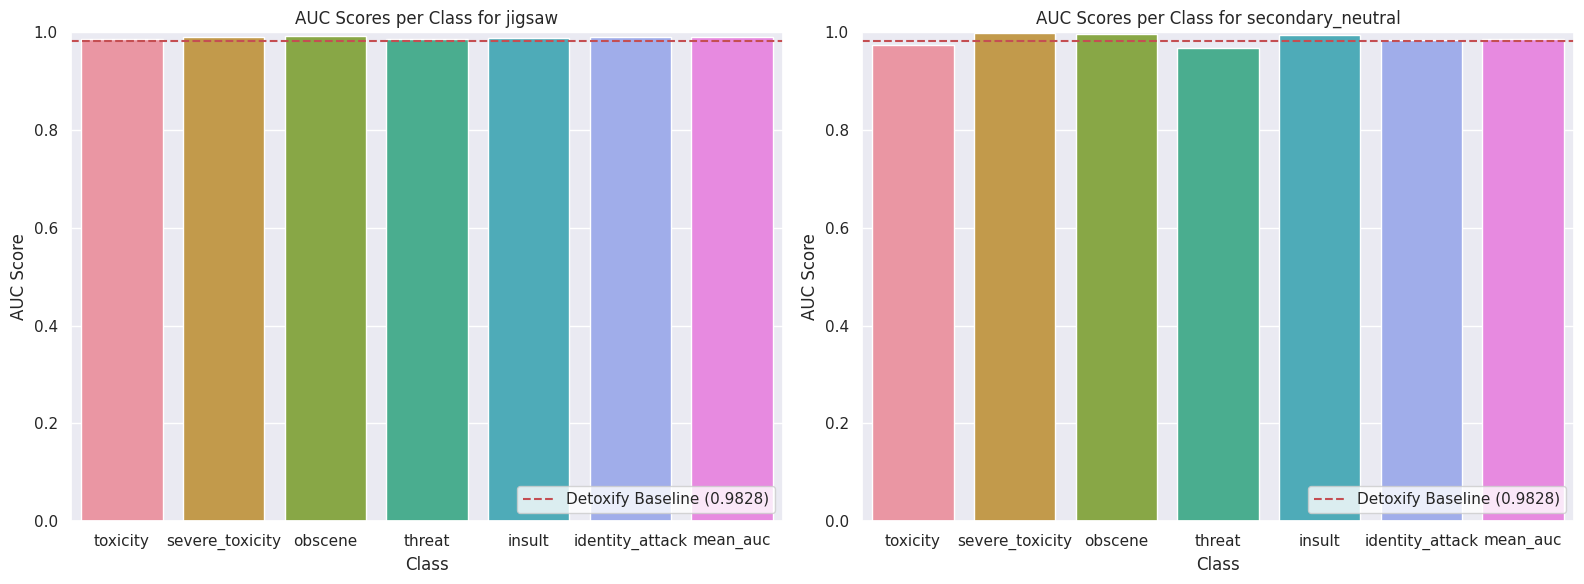

+-----------------+--------+-------------------+
|      Class      | Jigsaw | Secondary Neutral |
+-----------------+--------+-------------------+
|     toxicity    | 0.9873 |       0.9733      |
| severe_toxicity | 0.9908 |       0.9983      |
|     obscene     | 0.9921 |       0.9969      |
|      threat     | 0.9865 |       0.9678      |
|      insult     | 0.9888 |       0.994       |
| identity_attack | 0.9911 |       0.9847      |
|     mean_auc    | 0.9894 |       0.9894      |
+-----------------+--------+-------------------+


In [16]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/detoxify/checkpoints/converted/epoch=0-step=2981_test_results.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_all_data(data)


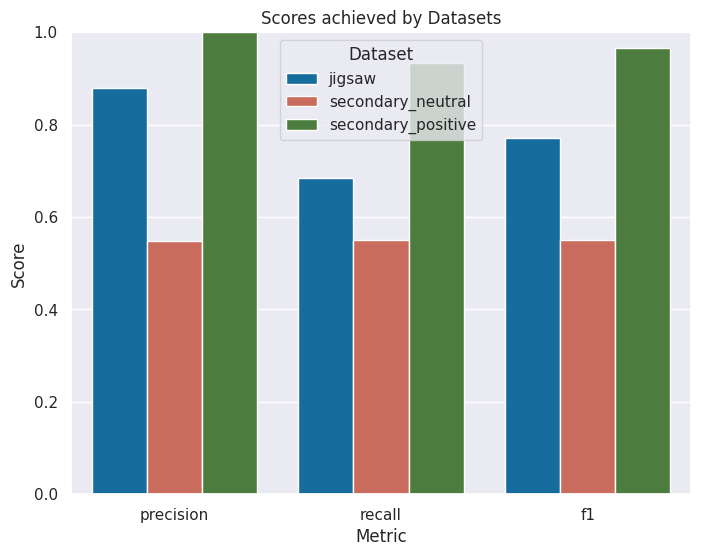

+--------------------+--------+-----------+--------+
|      Dataset       | Recall | Precision |   F1   |
+--------------------+--------+-----------+--------+
|       jigsaw       | 0.6856 |   0.8804  | 0.7709 |
| secondary_neutral  | 0.5501 |   0.5485  | 0.5493 |
| secondary_positive | 0.9325 |    1.0    | 0.9651 |
+--------------------+--------+-----------+--------+


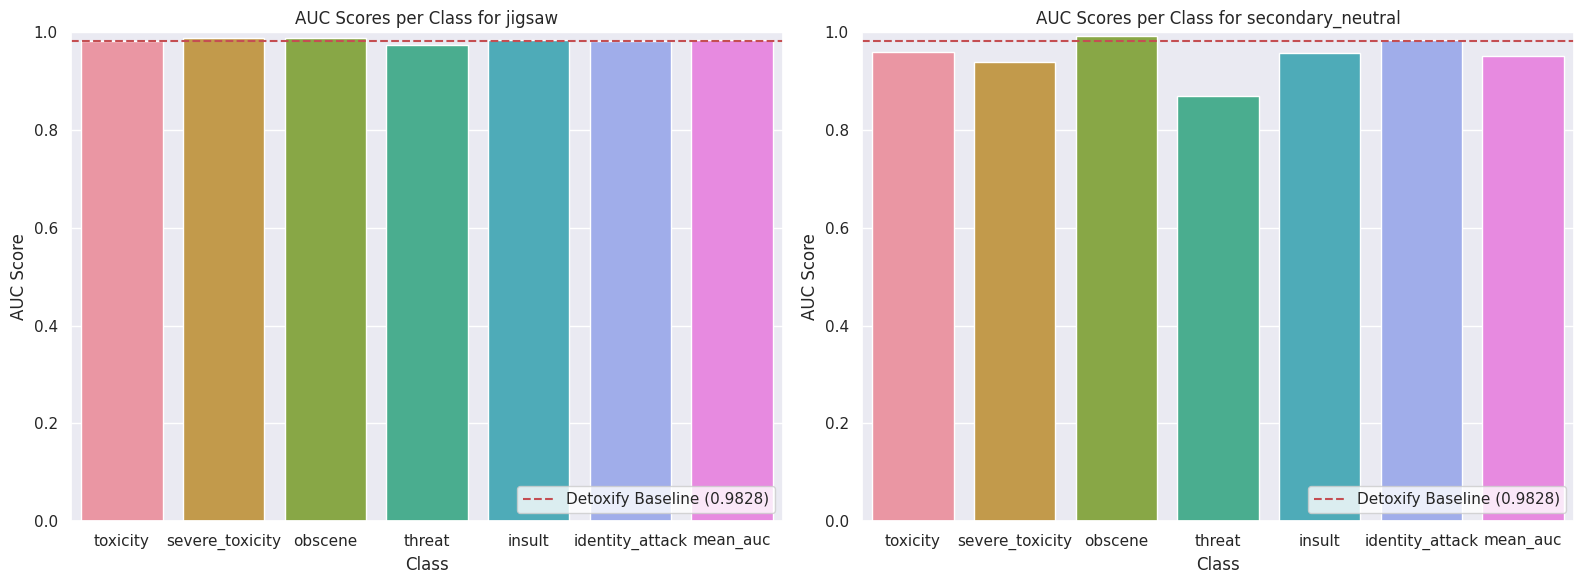

+-----------------+--------+-------------------+
|      Class      | Jigsaw | Secondary Neutral |
+-----------------+--------+-------------------+
|     toxicity    | 0.9815 |       0.9599      |
| severe_toxicity | 0.9893 |       0.9394      |
|     obscene     | 0.9888 |       0.9919      |
|      threat     | 0.9731 |       0.8698      |
|      insult     | 0.9848 |       0.9584      |
| identity_attack | 0.9829 |       0.984       |
|     mean_auc    | 0.9834 |       0.9834      |
+-----------------+--------+-------------------+


In [17]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/version_2/checkpoints/converted/epoch=0-step=3875_test_results.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_all_data(data)